In [129]:
import rasterio 
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot as plt
import geopandas as gpd

In [130]:
training_sites = gpd.read_file(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\trabajo sitios de entrenamiento\2021\sitios_entrenamient_geo.gpkg', layer = 'sitios_entrenamient_2021' )

In [131]:
full_dataset = rasterio.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\clipped_image_6b_ord.tif')

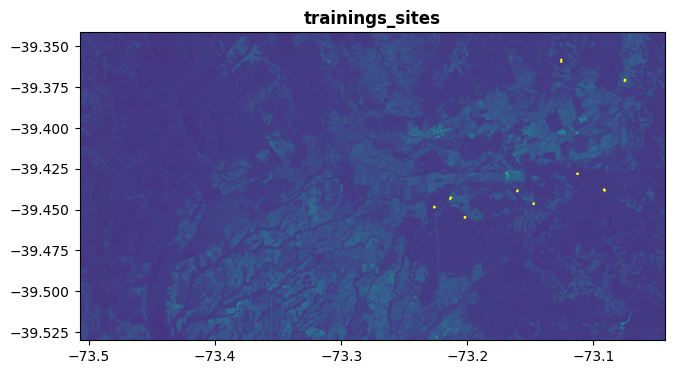

In [132]:
fig, ax1 = plt.subplots(figsize = (10,4))
show(full_dataset, ax = ax1, title = "trainings_sites")
training_sites.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
plt.show()

In [133]:
training_sites['Classname'] = training_sites['class']

In [134]:
training_sites

,class,geometry,Classname
0,Grassland,"POLYGON ((-73.20228 -39.45427, -73.20225 -39.4...",Grassland
1,Grassland,"POLYGON ((-73.14784 -39.44598, -73.14794 -39.4...",Grassland
2,Forest_Plantation,"POLYGON ((-73.09219 -39.43797, -73.09165 -39.4...",Forest_Plantation
3,Forest_Plantation,"POLYGON ((-73.11304 -39.42759, -73.11334 -39.4...",Forest_Plantation
4,Native_Forest,"POLYGON ((-73.16096 -39.43853, -73.16072 -39.4...",Native_Forest
5,Urban,"POLYGON ((-73.22686 -39.44843, -73.22628 -39.4...",Urban
6,Urban,"POLYGON ((-73.21402 -39.44328, -73.21354 -39.4...",Urban
7,Native_Forest,"POLYGON ((-73.07556 -39.37017, -73.07555 -39.3...",Native_Forest
8,Grassland,"POLYGON ((-73.20226 -39.45427, -73.20224 -39.4...",Grassland
9,Native_Forest,"POLYGON ((-73.12587 -39.35790, -73.12582 -39.3...",Native_Forest


In [135]:
training_sites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [136]:
len(training_sites)

10

In [137]:
geoms = training_sites.geometry.values

In [138]:
# Lets grab a single shapely geometry to check 
geometry = geoms[0]
print(type(geometry))
print(geometry)

<class 'shapely.geometry.polygon.Polygon'>
POLYGON ((-73.20228317899202 -39.45427231205459, -73.20224826902074 -39.45507524139381, -73.20150352296697 -39.45509851470799, -73.20143370302443 -39.45430722202587, -73.20228317899202 -39.45427231205459))


In [139]:
# transform to GeoJSON format
# This allows us to easily pass the geometry 
# data to other functions that require it in string format. 
from shapely.geometry import mapping
feature = [mapping(geometry)]
print(type(feature))
print(feature)

<class 'list'>
[{'type': 'Polygon', 'coordinates': (((-73.20228317899202, -39.45427231205459), (-73.20224826902074, -39.45507524139381), (-73.20150352296697, -39.45509851470799), (-73.20143370302443, -39.45430722202587), (-73.20228317899202, -39.45427231205459)),)}]


In [149]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import numpy as np
from shapely.geometry import mapping
from matplotlib import pyplot as plt

In [150]:
feature

[{'type': 'Polygon',
  'coordinates': (((-73.20228317899202, -39.45427231205459),
    (-73.20224826902074, -39.45507524139381),
    (-73.20150352296697, -39.45509851470799),
    (-73.20143370302443, -39.45430722202587),
    (-73.20228317899202, -39.45427231205459)),)}]

In [151]:
# Now let's extract the raster values values within the polygon using the rasterio mask() function

out_image, out_transform = mask(full_dataset, feature, crop = True)

In [152]:
out_image

array([[[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.01531125, 0.01352375, 0.01091125, 0.        ],
        [0.        , 0.01440375, 0.01415625, 0.01322125, 0.        ],
        [0.        , 0.01322125, 0.0133725 , 0.014555  , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.03109625, 0.0281675 , 0.02001375, 0.        ],
        [0.        , 0.02935   , 0.02781   , 0.02644875, 0.        ],
        [0.        , 0.02584375, 0.02631125, 0.02969375, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.01910625, 0.0167    , 0.0115025 , 0.        ],
        [0.        , 0.0173325 , 0.01707125, 0.01597125, 0.        ],
        [0.        , 0.015545  , 0.0159575 , 0.017525  , 0.        ],
        [0.     

In [53]:
out_transform

Affine(0.00026949458523585647, 0.0, -73.20254469303046,
       0.0, -0.00026949458523585647, -39.45400727852939)

In [54]:
training_sites['class'].unique()

array(['Grassland', 'Forest_Plantation', 'Native_Forest', 'Urban'],
      dtype=object)

In [55]:
X = np.array([], dtype=np.int8).reshape(0,6) # pixels for training
y = np.array([], dtype=np.string_) # labels for training

In [56]:
with rasterio.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\clipped_image_6b.tif') as src:
    band_count = src.count
    for index, geom in enumerate(geoms):
        feature = [mapping(geom)]
        
        # the mask function returs an array of the raster pixels within this feature
        out_image, out_transform = mask(src, feature, crop = True)
        # eliminate all the pixels with 0 values for all 8 bands - AKa not actually part of the shapefile
        out_image_trimmed = out_image[:,~np.all(out_image == 0, axis=0)]
        # eliminate all the pixels with 255 values for all 8 bands - AKA not actually part of the shapefile
        out_image_trimmed = out_image_trimmed[:,~np.all(out_image_trimmed == 255, axis=0)]
        # reshape the array to [pixel count, bands]
        out_image_reshaped = out_image_trimmed.reshape(-1, band_count)
        # append the labels to the y array
        y = np.append(y,[training_sites["Classname"][index]] * out_image_reshaped.shape[0])
        # stack the pizels onto the pixel array
        X = np.vstack((X,out_image_reshaped))

In [57]:
y.shape

(118,)

In [58]:
X.shape ## Me ha quedado un array de 118, 6 dimensiones

(118, 6)

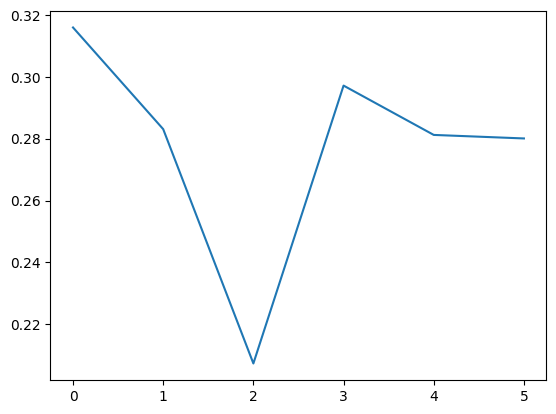

In [59]:
plt.plot(X[3])
plt.show()

In [60]:
training_sites['Classname'].size

10

In [61]:
# What are our classification labels?

labels = np.unique(training_sites['Classname'])

In [62]:
print('The training data include {n} classes:  {classes}\n'.format(n = training_sites['Classname'].size,
                                                                   classes = labels))

The training data include 10 classes:  ['Forest_Plantation' 'Grassland' 'Native_Forest' 'Urban']



In [63]:
# We will need a "X" matrix containing our features, and a "y" array containing our labels
print('Our X matrix is sized: {sz}'.format(sz=X.shape))
print('Our y array is sized: {sz}'.format(sz=y.shape))

Our X matrix is sized: (118, 6)
Our y array is sized: (118,)


In [64]:
classes = np.unique(y)
band_count = np.arange(1,6)

for class_type in classes:
    band_intensity = np.mean(X[y==class_type, :], axis=0)
    print(band_intensity)
    print(class_type)
    

print(band_count)

[0.07756385 0.07418135 0.09522784 0.09335255 0.10059933 0.10473596]
Forest_Plantation
[0.12370403 0.11448898 0.11080704 0.10484412 0.09424032 0.09183662]
Grassland
[0.09504991 0.0998435  0.09844994 0.10226178 0.10761397 0.11188816]
Native_Forest
[0.11967705 0.1171278  0.1148178  0.10899275 0.11457525 0.1186579 ]
Urban
[1 2 3 4 5]


Text(0.5, 1.0, 'Band Intensities Higher Ref Subset')

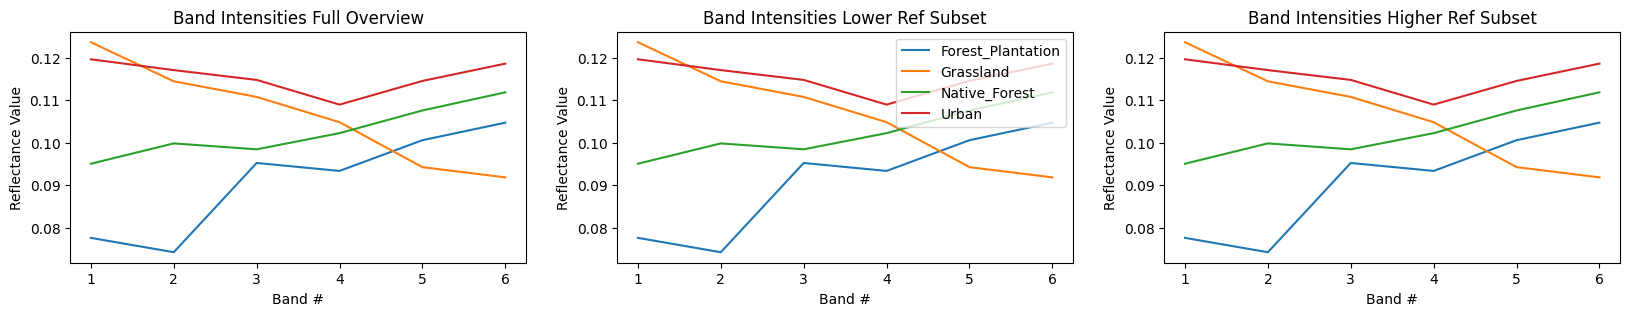

In [65]:
fig, ax = plt.subplots(1,3, figsize=[20,3])

# numbers 1-8
band_count = np.arange(1,7)

classes = np.unique(y)
for class_type in classes:
    band_intensity = np.mean(X[y==class_type, :], axis=0)
    ax[0].plot(band_count, band_intensity, label=class_type)
    ax[1].plot(band_count, band_intensity, label=class_type)
    ax[2].plot(band_count, band_intensity, label=class_type)
# plot them as lines

# Add some axis labels
ax[0].set_xlabel('Band #')
ax[0].set_ylabel('Reflectance Value')
ax[1].set_ylabel('Reflectance Value')
ax[1].set_xlabel('Band #')
ax[2].set_ylabel('Reflectance Value')
ax[2].set_xlabel('Band #')
#ax[0].set_ylim(32,38)
#ax[1].set_ylim(1,100)
#ax[2].set_ylim(70,140)
# ax.set
ax[1].legend(loc="upper right")
# Add a title
ax[0].set_title('Band Intensities Full Overview')
ax[1].set_title('Band Intensities Lower Ref Subset')
ax[2].set_title('Band Intensities Higher Ref Subset')

In [66]:
def str_class_to_int(class_array):
    class_array[class_array == 'Forest_Plantation'] = 0
    class_array[class_array == 'Grassland'] = 1
    class_array[class_array == 'Native_Forest'] = 2
    class_array[class_array == 'Urban'] = 3
    return(class_array.astype(int))

In [67]:
X.shape

(118, 6)

In [68]:
X

array([[0.0498925 , 0.04440625, 0.03049125, 0.04695   , 0.04404875,
        0.041945  ],
       [0.0405975 , 0.03890625, 0.0449975 , 0.12665875, 0.11416   ,
        0.07350125],
       [0.11818875, 0.1082475 , 0.10668   , 0.09811375, 0.0987325 ,
        0.1166075 ],
       [0.31610625, 0.283175  , 0.207275  , 0.2972825 , 0.281305  ,
        0.28016375],
       [0.26987875, 0.27130875, 0.3137    , 0.01910625, 0.0167    ,
        0.0115025 ],
       [0.0173325 , 0.01707125, 0.01597125, 0.015545  , 0.0159575 ,
        0.017525  ],
       [0.03109625, 0.0281675 , 0.02001375, 0.02935   , 0.02781   ,
        0.02644875],
       [0.02584375, 0.02631125, 0.02969375, 0.01531125, 0.01352375,
        0.01091125],
       [0.01440375, 0.01415625, 0.01322125, 0.01322125, 0.0133725 ,
        0.014555  ],
       [0.213545  , 0.18611375, 0.18611375, 0.20843   , 0.1599475 ,
        0.1599475 ],
       [0.20338375, 0.1479575 , 0.1479575 , 0.320025  , 0.28082375,
        0.28082375],
       [0.31519875, 0

In [69]:
y.shape

(118,)

In [70]:
y

array(['Grassland', 'Grassland', 'Grassland', 'Grassland', 'Grassland',
       'Grassland', 'Grassland', 'Grassland', 'Grassland', 'Grassland',
       'Grassland', 'Grassland', 'Grassland', 'Grassland', 'Grassland',
       'Grassland', 'Grassland', 'Grassland', 'Forest_Plantation',
       'Forest_Plantation', 'Forest_Plantation', 'Forest_Plantation',
       'Forest_Plantation', 'Forest_Plantation', 'Forest_Plantation',
       'Forest_Plantation', 'Forest_Plantation', 'Forest_Plantation',
       'Forest_Plantation', 'Forest_Plantation', 'Forest_Plantation',
       'Forest_Plantation', 'Forest_Plantation', 'Forest_Plantation',
       'Forest_Plantation', 'Forest_Plantation', 'Forest_Plantation',
       'Forest_Plantation', 'Forest_Plantation', 'Forest_Plantation',
       'Forest_Plantation', 'Forest_Plantation', 'Forest_Plantation',
       'Forest_Plantation', 'Native_Forest', 'Native_Forest',
       'Native_Forest', 'Native_Forest', 'Native_Forest', 'Native_Forest',
       'Native_Fores

In [71]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [72]:
from sklearn.tree import DecisionTreeClassifier
## Partimos por lo simple

dt = DecisionTreeClassifier(criterion= 'gini')
dt.fit(X,y)

DecisionTreeClassifier()

In [87]:
clipped_image = rasterio.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\clipped_image_6b_ord.tif')

In [88]:
img = clipped_image.read(1)

In [89]:
img_full = clipped_image.read()

In [90]:
img_full
print(img_full.shape)

(6, 700, 1722)


In [91]:
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster, reshape_as_image

In [92]:
reshaped_img_full = reshape_as_image(img_full)
print(reshaped_img_full.shape)

(700, 1722, 6)


Now we can predict for each pixel in our image:

In [93]:
img_full.shape

(6, 700, 1722)

In [94]:
reshaped_img_full.shape

(700, 1722, 6)

In [95]:
reshaped_img_full.reshape(-1,3).shape

(2410800, 3)

In [96]:
class_prediction = gnb.predict(reshaped_img_full.reshape(-1,6))

In [98]:
class_prediction_dt = dt.predict(reshaped_img_full.reshape(-1,6))

In [99]:
# Reshape our classification map back into a 2D matrix so we can visualize it
class_prediction = class_prediction.reshape(reshaped_img_full[:,:,0].shape)

In [100]:
class_prediction = str_class_to_int(class_prediction)

In [101]:
class_prediction

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 0, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

Let's visualize it!

First we'll make a colormap so we can visualize the classes, which are just encoded as integers, in more logical colors. Don't worry too much if this code is confusing! It can be a little clunky to specify colormaps for matplotlib.

In [125]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors
    
# find the highest pixel value in the prediction image
n = int(np.max(class_prediction))

# next setup a colormap for our map
colors = dict((
    (0, (0, 0, 0, 255)),   # Blue - Water
    (1, (0,0, 0, 255)),      # Brown - WetSand
    (2, (0, 0, 0, 255)),    # Purple - Emergent Wetland
    (3, (244, 164, 96, 255)),   # Tan - Sand
    
))

# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (0, 0, 0, 255) for key in range(0, n+1)]

cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n+1)

Now show the classified map next to the RGB image!

C:\Users\CRISTIAN\AppData\Local\Temp\ipykernel_2260\2104932122.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


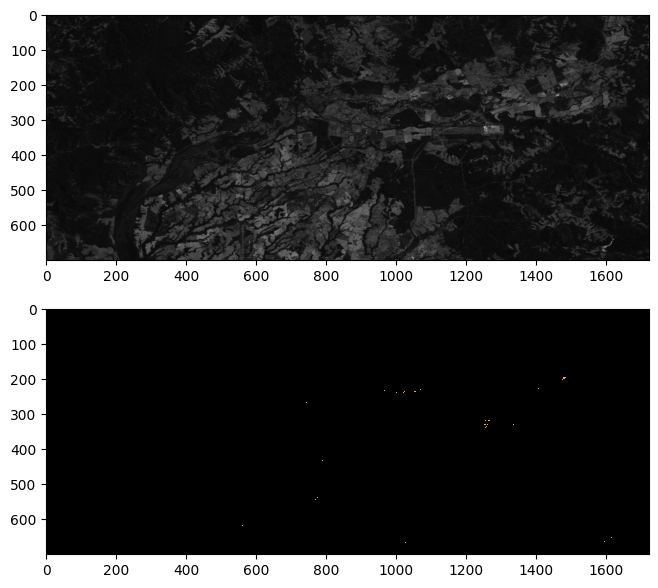

In [126]:
fig, axs = plt.subplots(2,1,figsize=(10,7))

img_stretched = color_stretch(reshaped_img_full, [2, 2, 2])
axs[0].imshow(img_stretched)

axs[1].imshow(class_prediction, cmap=cmap, interpolation='none')

fig.show()